In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier 

In [43]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\train.csv', encoding = 'utf-8')

In [44]:
labels = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\labels.csv', encoding = 'utf-8')

In [45]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [46]:
#One Hot encoding
temp  =[]
for i in labels["In-hospital_death"]:
    if i == 0:
        temp.append([1,0])
    else:
        temp.append([0,1])
temp = np.array(temp)

In [47]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [48]:
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


In [49]:
X = new.drop('In-hospital_death', axis=1)
y = new['In-hospital_death']

In [50]:
df = new.drop(['Gender','Cholesterol','HCT','ICUType','Height'] , axis =1)

In [51]:
new.isna()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
new.dropna()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.140,124.951220,4.700000,56.700000,7.495000,0
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,145.0,0.900000,68.865385,...,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429,0
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,117.0,0.840000,58.754774,...,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000,0
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,145.0,1.125000,74.166667,...,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667,0
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,145.0,9.650000,92.923077,...,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

In [ ]:
# classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# # Initializing Multi-layer perceptron  classifier
# classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
#                             learning_rate = "constant", max_iter = 2000, random_state = 42)

# # Initialing Nu Support Vector classifier
# classifier3 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# # Initializing Random Forest classifier
# classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
#                                      max_features = "auto", min_samples_leaf = 0.005,
#                                      min_samples_split = 0.005, n_jobs = -1, random_state = 42)


In [ ]:
# sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
#                             shuffle = False,
#                             use_probas = True,
#                             cv = 5,
#                             meta_classifier = SVC(probability = True))

In [ ]:
# classifiers = {"SVC": classifier1,
#                "MLP": classifier2,
#                "NuSVC": classifier3,
#                "RF": classifier4,
#                "Stack": sclf}

In [ ]:
# for key in classifiers:
#     # Get classifier
#     classifier = classifiers[key]
    
#     # Fit classifier
#     classifier.fit(X_train, y_train)
        
#     # Save fitted classifier
#     classifiers[key] = classifier

In [56]:
meta_model = LogisticRegression()

In [57]:
stacking_classifier = StackingClassifier(classifiers=[lr, rf, gb, xgb, lgbm], meta_classifier=meta_model)

In [58]:
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
for train_index, test_index in kfold.split(X_train_scaled, y_train):
    X_train_k, X_test_k = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_k, y_test_k = y_train.iloc[train_index], y_train.iloc[test_index]
    stacking_classifier.fit(X_train_k, y_train_k)
    y_pred_k = stacking_classifier.predict(X_test_k)
    accuracy = accuracy_score(y_test_k, y_pred_k)
    print(f'Accuracy: {accuracy}')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8546875


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.86875


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8765625


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.865625


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.863849765258216


In [59]:
y_pred = stacking_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy}')

Accuracy on test set: 0.87125


In [60]:
stacking_classifier.fit(X_train, y_train)

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[07:23:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[LogisticRegression(),
                                RandomForestClassifier(random_state=42),
                                GradientBoostingClassifier(random_state=42),
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learn...
                                              max_depth=None,
                                              min_child_weight=None,
                                      

In [63]:
y_prob = stacking_classifier.predict_proba(X_test)[:,1]

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [65]:
roc_auc = auc(fpr, tpr)

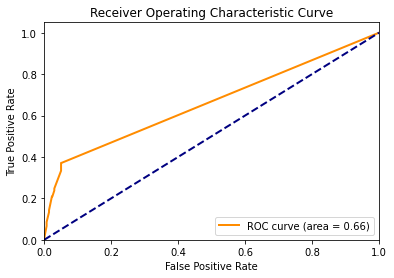

In [66]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.88
Precision: 0.58
Recall: 0.21
F1 score: 0.31
